<a href="https://colab.research.google.com/github/Keerthana-singupuram/Spaceship-Titanic-Project-using-Machine-Learning./blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Spaceship Titanic**


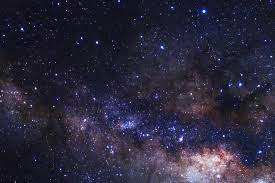




The data is provided in three different files in csv format which includes multiple factors regarding the passengers of the spaceship titanic. They are *train.csv, test.csv* and *sample_submission.csv*

Where the **objective** is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.

The column details of the dataset are as follows : 

**1.** ***train.csv*** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
* **PassengerId** - A unique Id for each passenger. Each Id takes the form *gggg_pp* where *gggg* indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
* **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* **Destination** - The planet the passenger will be debarking to.
* **Age** - The age of the passenger.
* **VIP** - Whether the passenger has paid for special VIP service during the voyage.
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* **Name** - The first and last names of the passenger.
* **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


***2. test.csv*** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.


***3. sample_submission.csv*** - A submission file in the correct format.
* **PassengerId** - Id for each passenger in the test set.
* **Transported** - The target. For each passenger, predict either True or False.

**Tools used** **:**
* Python - Numpy, Pandas, Scikit-learn, Matplotlib libraries.


**Content** **:** 
* Imputing null values.
* Exploratory data analysis.
* Feature engineering.
* Model building.
* Model tuning.

### **Importing Libraries :**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

### **Importing Data :**

In [ ]:
data1=pd.read_csv('/content/train.csv')

In [ ]:
data1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test_data=pd.read_csv('/content/test.csv')


In [ ]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### **Basic Investigation on data :**

In [ ]:
data1.shape

(8693, 14)

In [ ]:
data1.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
data1.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
test_data.shape

(4277, 13)

In [ ]:
test_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [ ]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
data=data1.iloc[:,[2,3,5,6,7,10,11,13]]
data

,CryoSleep,Cabin,Age,VIP,RoomService,Spa,VRDeck,Transported
0,False,B/0/P,39.0,False,0.0,0.0,0.0,False
1,False,F/0/S,24.0,False,109.0,549.0,44.0,True
2,False,A/0/S,58.0,True,43.0,6715.0,49.0,False
3,False,A/0/S,33.0,False,0.0,3329.0,193.0,False
4,False,F/1/S,16.0,False,303.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...
8688,False,A/98/P,41.0,True,0.0,1643.0,74.0,False
8689,True,G/1499/S,18.0,False,0.0,0.0,0.0,False
8690,False,G/1500/S,26.0,False,0.0,1.0,0.0,True
8691,False,E/608/S,32.0,False,0.0,353.0,3235.0,False


In [ ]:
pd.options.mode.chained_assignment=None

### **Time to encode the label :**

In [ ]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
data['CryoSleep']=l1.fit_transform(data['CryoSleep'])
data['Cabin']=l1.fit_transform(data['Cabin'])
data['VIP']=l1.fit_transform(data['VIP'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CryoSleep    8693 non-null   int64  
 1   Cabin        8693 non-null   int64  
 2   Age          8514 non-null   float64
 3   VIP          8693 non-null   int64  
 4   RoomService  8512 non-null   float64
 5   Spa          8510 non-null   float64
 6   VRDeck       8505 non-null   float64
 7   Transported  8693 non-null   bool   
dtypes: bool(1), float64(4), int64(3)
memory usage: 484.0 KB


### **Dealing with null values :**

In [ ]:
data.isnull().any()

CryoSleep      False
Cabin          False
Age             True
VIP            False
RoomService     True
Spa             True
VRDeck          True
Transported    False
dtype: bool

In [ ]:
data.isnull().sum()

CryoSleep        0
Cabin            0
Age            179
VIP              0
RoomService    181
Spa            183
VRDeck         188
Transported      0
dtype: int64

In [ ]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [ ]:
data['RoomService'].fillna(data['Age'].mean(),inplace=True)

In [ ]:
data['Spa'].fillna(data['Age'].mean(),inplace=True)

In [ ]:
data['VRDeck'].fillna(data['Age'].mean(),inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CryoSleep    8693 non-null   int64  
 1   Cabin        8693 non-null   int64  
 2   Age          8693 non-null   float64
 3   VIP          8693 non-null   int64  
 4   RoomService  8693 non-null   float64
 5   Spa          8693 non-null   float64
 6   VRDeck       8693 non-null   float64
 7   Transported  8693 non-null   bool   
dtypes: bool(1), float64(4), int64(3)
memory usage: 484.0 KB


*Perfect! No more nulls, lets check the behaviour of the data set.*

### **Exploratory Data Analysis** 

In [ ]:
data.describe()

,CryoSleep,Cabin,Age,VIP,RoomService,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.399287,3227.857702,28.827930,0.069596,220.609554,305.195733,298.885270
std,0.538345,2018.301775,14.339054,0.333871,660.331898,1125.405913,1133.970181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1341.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3218.000000,27.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5018.000000,37.000000,0.000000,41.000000,53.000000,40.000000
max,2.000000,6560.000000,79.000000,2.000000,14327.000000,22408.000000,24133.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f0888ea3d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0888eb12e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0888ea3b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0888eb1880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0888eb1b50>],
 'means': []}

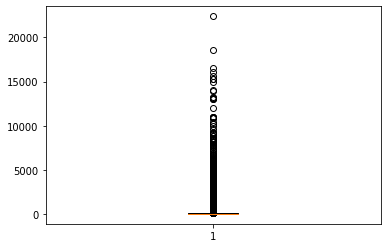

In [ ]:
plt.boxplot(data['Spa'],vert=True)

<AxesSubplot:xlabel='CryoSleep', ylabel='Density'>

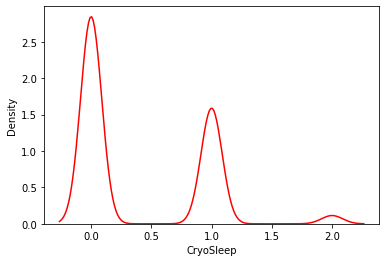

In [ ]:
sns.kdeplot(data["CryoSleep"],color = 'red')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


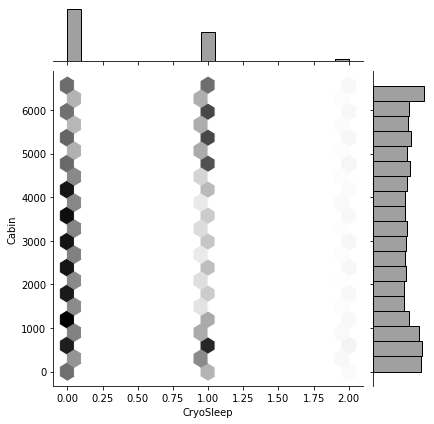

In [ ]:
x=data['CryoSleep']
y=data['Cabin']
sns.jointplot(x,y,kind='hex',color='gray')

In [ ]:
for col in data.iloc[:,:-1].columns:
    if data.iloc[:,:-1][col].dtypes != 'object':
        q1 , q3 =data.iloc[:,:-1][col].quantile(0.25),data.iloc[:,:-1][col].quantile(0.75)
        iqr = q3 - q1
        ll = q1-1.5*iqr
        ul = q3 + 1.5*iqr

        data["Spa"] = np.where(data["Spa"]>ul,data["Spa"].mean(),np.where(data["Spa"]<ll,data["Spa"].mean(),data["Spa"]))

        data["Age"] = np.where(data["Age"]>ul,data["Age"].mean(),np.where(data["Age"]<ll,data["Age"].mean(),data["Age"]))  

        data["Cabin"] = np.where(data["Cabin"]>ul,data["Cabin"].mean(),np.where(data["Cabin"]<ll,data["Cabin"].mean(),data["Cabin"]))

        data["VIP"] = np.where(data["VIP"]>ul,data["VIP"].mean(),np.where(data["VIP"]<ll,data["VIP"].mean(),data["VIP"]))  

        data["RoomService"] = np.where(data["RoomService"]>ul,data["RoomService"].mean(),np.where(data["RoomService"]<ll,data["RoomService"].mean(),data["RoomService"]))

        data["VRDeck"] = np.where(data["VRDeck"]>ul,data["VRDeck"].mean(),np.where(data["VRDeck"]<ll,data["VRDeck"].mean(),data["VRDeck"]))

In [ ]:
Q1=data.iloc[:,:-1].quantile(0.25)
Q3=data.iloc[:,:-1].quantile(0.75)
IQR=Q3-Q1
IQR
print("The count of outliers of the all factors is : ")
((data.iloc[:,:-1] < (Q1 - 1.5 * IQR)) | (data.iloc[:,:-1]> (Q3 + 1.5 * IQR))).sum()

The count of outliers of the all factors is : 


CryoSleep      0
Cabin          0
Age            0
VIP            0
RoomService    0
Spa            0
VRDeck         0
dtype: int64

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [ ]:
bar=data['Transported'].value_counts()
bar

True     4378
False    4315
Name: Transported, dtype: int64

### **Generation of equal ratio of classes :**

In [ ]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()
x_data,y_data=nm.fit_resample(x,y)

### **Count of hashable objects :**

In [ ]:
from collections import Counter
print(Counter(y_data))

Counter({False: 4315, True: 4315})


### **Data Normalization :**

In [ ]:
from sklearn.preprocessing import StandardScaler
ssd=StandardScaler()
x_scaled=ssd.fit_transform(x_data)
x_scaled

array([[-7.39890343e-01, -2.15095497e-10,  3.73745479e-12, ...,
        -5.96855898e-12, -6.66489086e-12,  1.86446414e-11],
       [-7.39890343e-01, -2.15095497e-10,  3.73745479e-12, ...,
        -5.96855898e-12, -6.66489086e-12,  1.86446414e-11],
       [-7.39890343e-01, -2.15095497e-10,  3.73745479e-12, ...,
        -5.96855898e-12, -6.66489086e-12,  1.86446414e-11],
       ...,
       [ 1.12061480e+00, -2.15095497e-10,  3.73745479e-12, ...,
        -5.96855898e-12, -6.66489086e-12,  1.86446414e-11],
       [-7.39890343e-01, -2.15095497e-10,  3.73745479e-12, ...,
        -5.96855898e-12, -6.66489086e-12,  1.86446414e-11],
       [ 1.12061480e+00, -2.15095497e-10,  3.73745479e-12, ...,
        -5.96855898e-12, -6.66489086e-12,  1.86446414e-11]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_data,test_size=0.2,random_state=20)

## **Machine Learning Algorithms :**

### ***1.*** ***Naive Bayes***

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
gnb_pred=gnb.predict(x_test)
gnb_pred

array([ True, False, False, ..., False,  True,  True])

In [ ]:
accuracy_score(y_test,gnb_pred)*100

71.32097334878331

### ***2.*** ***Random Forest*** 



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rfc_pred=rfc.predict(x_test)
rfc_pred

array([ True, False, False, ..., False,  True,  True])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,rfc_pred)*100

71.32097334878331

### ***3.*** ***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtc_pred=dtc.predict(x_test)
dtc_pred

array([ True, False, False, ..., False,  True,  True])

In [ ]:
accuracy_score(y_test,dtc_pred)*100

71.84241019698725

## **Optimization**
### ***Ensemble Method :***

In [ ]:
from sklearn.ensemble import VotingClassifier
vcr=VotingClassifier(estimators=[("Random_Forest",rfc),("Decision_Tree",dtc),("Naive_Bayes",gnb)])
vcr.fit(x_train,y_train)

VotingClassifier(estimators=[('Random_Forest', RandomForestClassifier()),
                             ('Decision_Tree', DecisionTreeClassifier()),
                             ('Naive_Bayes', GaussianNB())])

In [ ]:
vcr_pred=vcr.predict(x_test)
vcr_pred

array([ True, False, False, ..., False,  True,  True])

In [ ]:
accuracy_score(y_test,vcr_pred)*100

71.32097334878331

### ***Conversion of predicted values to a data frame :***

In [ ]:
training_result=pd.DataFrame(np.c_[y_test,vcr_pred],columns=["Actual","Transported"])
training_result

,Actual,Transported
0,True,True
1,True,False
2,False,False
3,False,False
4,True,True
...,...,...
1721,False,True
1722,False,False
1723,False,False
1724,False,True


In [ ]:
training_result['Transported'].value_counts()

False    1110
True      616
Name: Transported, dtype: int64

In [ ]:
testing_data=test_data.iloc[:,[2,3,5,6,7,10,11]]
testing_data

,CryoSleep,Cabin,Age,VIP,RoomService,Spa,VRDeck
0,True,G/3/S,27.0,False,0.0,0.0,0.0
1,False,F/4/S,19.0,False,0.0,2823.0,0.0
2,True,C/0/S,31.0,False,0.0,0.0,0.0
3,False,C/1/S,38.0,False,0.0,181.0,585.0
4,False,F/5/S,20.0,False,10.0,0.0,0.0
...,...,...,...,...,...,...,...
4272,True,G/1496/S,34.0,False,0.0,0.0,0.0
4273,False,NaN,42.0,False,0.0,10.0,144.0
4274,True,D/296/P,NaN,False,0.0,0.0,0.0
4275,False,D/297/P,NaN,False,0.0,0.0,523.0


In [ ]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CryoSleep    4184 non-null   object 
 1   Cabin        4177 non-null   object 
 2   Age          4186 non-null   float64
 3   VIP          4184 non-null   object 
 4   RoomService  4195 non-null   float64
 5   Spa          4176 non-null   float64
 6   VRDeck       4197 non-null   float64
dtypes: float64(4), object(3)
memory usage: 234.0+ KB


### **Normalization of labels :**

In [ ]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
testing_data['CryoSleep']=l1.fit_transform(testing_data['CryoSleep'])
testing_data['Cabin']=l1.fit_transform(testing_data['Cabin'])
testing_data['VIP']=l1.fit_transform(testing_data['VIP'])

### ***Dealing with nulls in testing data :***

In [ ]:
testing_data

,CryoSleep,Cabin,Age,VIP,RoomService,Spa,VRDeck
0,1,2784,27.0,0,0.0,0.0,0.0
1,0,1867,19.0,0,0.0,2823.0,0.0
2,1,257,31.0,0,0.0,0.0,0.0
3,0,259,38.0,0,0.0,181.0,585.0
4,0,1940,20.0,0,10.0,0.0,0.0
...,...,...,...,...,...,...,...
4272,1,2679,34.0,0,0.0,0.0,0.0
4273,0,3265,42.0,0,0.0,10.0,144.0
4274,1,602,NaN,0,0.0,0.0,0.0
4275,0,603,NaN,0,0.0,0.0,523.0


In [ ]:
testing_data.isnull().any()

CryoSleep      False
Cabin          False
Age             True
VIP            False
RoomService     True
Spa             True
VRDeck          True
dtype: bool

In [ ]:
testing_data.isnull().sum()

CryoSleep        0
Cabin            0
Age             91
VIP              0
RoomService     82
Spa            101
VRDeck          80
dtype: int64

In [ ]:
testing_data['Age'].fillna(testing_data['Age'].mean(),inplace=True)
testing_data['Spa'].fillna(testing_data['Spa'].mean(),inplace=True)
testing_data['VRDeck'].fillna(testing_data['VRDeck'].mean(),inplace=True)
testing_data['RoomService'].fillna(testing_data['RoomService'].mean(),inplace=True)

In [ ]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CryoSleep    4277 non-null   int64  
 1   Cabin        4277 non-null   int64  
 2   Age          4277 non-null   float64
 3   VIP          4277 non-null   int64  
 4   RoomService  4277 non-null   float64
 5   Spa          4277 non-null   float64
 6   VRDeck       4277 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 234.0 KB


*Perfect! No more nulls here.*

### ***Outlier Detection :***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

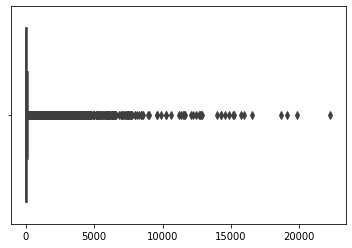

In [ ]:
sns.boxplot(testing_data.values)

In [ ]:
Q1=testing_data.quantile(0.25)
Q3=testing_data.quantile(0.75)
IQR=Q3-Q1
IQR
print("The total count of outliers is : ")
((testing_data < (Q1 - 1.5 * IQR)) | (testing_data> (Q3 + 1.5 * IQR))).sum()

The total count of outliers is : 


CryoSleep        0
Cabin            0
Age             75
VIP            167
RoomService    908
Spa            908
VRDeck         907
dtype: int64

### ***Data Standardization :***

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
test_scaled=ss.fit_transform(testing_data)
test_scaled

array([[ 1.11673669e+00,  1.15821732e+00, -1.18221624e-01, ...,
        -3.64779540e-01, -2.74557735e-01, -2.51560551e-01],
       [-7.58521582e-01,  2.51716199e-01, -6.88601357e-01, ...,
        -3.64779540e-01,  2.28300781e+00, -2.51560551e-01],
       [ 1.11673669e+00, -1.33985065e+00,  1.66968243e-01, ...,
        -3.64779540e-01, -2.74557735e-01, -2.51560551e-01],
       ...,
       [ 1.11673669e+00, -9.98800607e-01, -2.53299485e-16, ...,
        -3.64779540e-01, -2.74557735e-01, -2.51560551e-01],
       [-7.58521582e-01, -9.97812057e-01, -2.53299485e-16, ...,
        -3.64779540e-01, -2.74557735e-01,  1.71876593e-01],
       [ 1.11673669e+00,  1.05540803e+00,  1.02253784e+00, ...,
        -3.64779540e-01, -2.74557735e-01, -2.51560551e-01]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

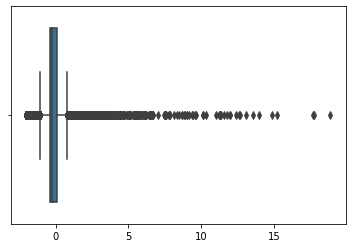

In [ ]:
sns.boxplot(test_scaled)

In [ ]:
vcr_pred_test=vcr.predict(test_scaled)
vcr_pred_test

array([ True, False,  True, ...,  True, False,  True])

### ***Conversion of predicted values to a dataframe :***

In [ ]:
test_result=pd.DataFrame(np.c_[test_data['PassengerId'],vcr_pred_test],columns=["PassengerId","Transported"])
test_result.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [ ]:
test_result['Transported'].unique()

array([True, False], dtype=object)

In [ ]:
test_result['Transported'].value_counts()

False    2640
True     1637
Name: Transported, dtype: int64

In [ ]:
test_result.to_csv("Titanic Spaceship Project.csv")